In [42]:
# Just to download the dataset csv file:
import requests, os
res = requests.get('https://raw.githubusercontent.com/wblakecannon/DataCamp/master/10-cleaning-data-in-python/_datasets/dob_job_application_filings_subset.csv')

csvFile = open('dob_job_application_filings_subset.csv', 'wb')
for chunk in res.iter_content(100000):
    csvFile.write(chunk)
csvFile.close()

<h1>Loading and viewing your data</h1>
<div class=""><p>In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset
from the <a href="http://opendata.cityofnewyork.us/" target="_blank" rel="noopener noreferrer">NYC Open Data</a> portal. This dataset consists of job applications filed on January 22, 2017.</p>
<p>Your first task is to load this dataset into a DataFrame and then inspect it using the <code>.head()</code> and <code>.tail()</code> methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns.
Therefore, you need to look at the data in another way. </p>
<p>The <code>.shape</code> and <code>.columns</code> attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, <code>df_subset</code>, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.</p>
<p>Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.</p></div>

In [43]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

print('the head of df')
print(df.head())

print('the tail of df')
print(df.tail())

print(' the shape of df')
print(df.shape)

print('the columns of df')
print(df.columns)

# Print the head and tail of df_subset
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']].copy()
print(df_subset.head())
print(df_subset.tail())

the head of df
       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                     

e:\softwares\python\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h1>Further diagnosis</h1>
<div class=""><p>In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful <code>.info()</code> method. </p>
<p>The <code>.info()</code> method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the <code>'Initial Cost'</code> and <code>'Total Est. Fee'</code> columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them. </p>
<p>The full DataFrame <code>df</code> and the subset DataFrame <code>df_subset</code> have been pre-loaded. Your task is to use the <code>.info()</code> method on these and analyze the results.</p></div>

In [44]:
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [45]:
df.describe()

,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


<h1>Frequency counts for categorical data</h1>
<div class=""><p>As you've seen, <code>.describe()</code> can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? 
One way is by using the <code>.value_counts()</code> method, which returns the frequency counts for each unique value in a column!</p>
<p>This method also has an optional parameter called <code>dropna</code> which is <code>True</code> by default.
What this means is if you have missing data in a column, it will not give a frequency count of them.
You want to set the <code>dropna</code> column to <code>False</code> so if there are missing values in a column, it will give you the frequency counts.</p>
<p>In this exercise, you're going to look at the <code>'Borough'</code>, <code>'State'</code>, and <code>'Site Fill'</code> columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the <code>'State'</code> column from <code>NY</code>, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.</p></div>

In [46]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
MA        6
KS        6
GA        6
VA        5
CO        4
AZ        3
SC        3
WI        3
MN        3
UT        2
NC        2
RI        2
NM        1
MI        1
VT        1
IN        1
WA        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


<h1>Visualizing single variables with histograms</h1>
<div class=""><p>Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.</p>
<p>You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is <code>'Existing Zoning Sqft'</code>.</p>
<p>The <code>.plot()</code> method allows you to create a plot of each column of a DataFrame. The <code>kind</code> parameter allows you to specify the type of plot to use - <code>kind='hist'</code>, for example, plots a histogram.</p>
<p>In the IPython Shell, begin by computing summary statistics for the <code>'Existing Zoning Sqft'</code> column using the <code>.describe()</code> method. You'll notice that there are extremely large differences between the <code>min</code> and <code>max</code> values,
and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments <code>logx=True</code> or <code>logy=True</code> can be passed in to <code>.plot()</code> depending on which axis you want to rescale.</p>
<p>Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.</p></div>

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


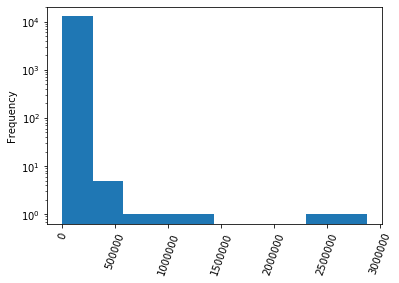

In [47]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=False, logy=True)

# Display the histogram
plt.show()

<h1>Visualizing multiple variables with boxplots</h1>
<div class=""><p>Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical. </p>
<p>In this exercise, your job is to use a boxplot to compare the <code>'initial_cost'</code> across the different values of the <code>'Borough'</code> column. The pandas <code>.boxplot()</code> method is a quick way to do this, in which you have to specify the <code>column</code> and <code>by</code> parameters. Here, you want to visualize how <code>'initial_cost'</code> varies <em>by</em> <code>'Borough'</code>.</p>
<p><code>pandas</code> and <code>matplotlib.pyplot</code> have been imported for you as <code>pd</code> and <code>plt</code>, respectively, and the DataFrame has been pre-loaded as <code>df</code>.</p></div>

In [65]:
df['initial_cost'] = df['Initial Cost'].str.replace('$','').astype(float)
df['initial_cost']
df_subset['initial_cost'] = df_subset['Initial Cost'].str.replace('$','').astype(float)
df_subset['initial_cost']

0         75000.0
1             0.0
2         30000.0
3          1500.0
4         19500.0
           ...   
12841     30700.0
12842     62000.0
12843    166000.0
12844     65000.0
12845      9500.0
Name: initial_cost, Length: 12846, dtype: float64

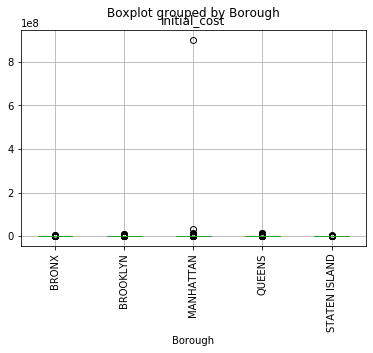

In [70]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

<h1>Visualizing multiple variables with scatter plots</h1>
<div class=""><p>Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.</p>
<p>In this exercise, your job is to make a scatter plot with <code>'initial_cost'</code> on the x-axis and the <code>'total_est_fee'</code> on the y-axis. You can do this by using the DataFrame <code>.plot()</code> method with <code>kind='scatter'</code>.
You'll notice right away that there are 2 major outliers shown in the plots.</p>
<p>Since these outliers dominate the plot, an additional DataFrame, <code>df_subset</code>, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll
find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.</p>
<p>When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.</p></div>

In [67]:
df['total_est_fee'] = df['Total Est. Fee'].str.replace('$','').astype(float)
df['total_est_fee']

df_subset['total_est_fee'] = df_subset['Total Est. Fee'].str.replace('$','').astype(float)
df_subset['total_est_fee']

0         986.00
1        1144.00
2         522.50
3         225.00
4         389.50
          ...   
12841     448.62
12842     852.10
12843    1923.30
12844     883.00
12845     316.50
Name: total_est_fee, Length: 12846, dtype: float64

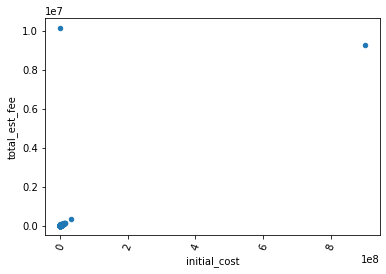

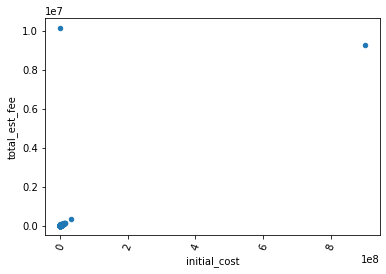

In [68]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()